In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [6]:
print(os.listdir("Apple2"))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [7]:
SIZE = 256

In [8]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("Apple2\Apple___Apple_scab"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Apple2\Apple___Black_rot"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Apple2\Apple___Cedar_apple_rust"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Apple2\Apple___healthy"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Apple___Apple_scab
Apple2\Apple___Apple_scab\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_final_masked.jpg
Apple2\Apple___Apple_scab\01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_final_masked.jpg
Apple2\Apple___Apple_scab\01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_final_masked.jpg
Apple2\Apple___Apple_scab\0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_final_masked.jpg
Apple2\Apple___Apple_scab\023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487_final_masked.jpg
Apple2\Apple___Apple_scab\0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055_final_masked.jpg
Apple2\Apple___Apple_scab\029424b0-0ef5-491b-9ef5-069190d24d8f___FREC_Scab 3504_final_masked.jpg
Apple2\Apple___Apple_scab\03354abb-aa1c-4f9d-a1ef-9f40505cd539___FREC_Scab 3355_final_masked.jpg
Apple2\Apple___Apple_scab\0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966_final_masked.jpg
Apple2\Apple___Apple_scab\0395b847-2c73-4674-826f-33a6afb5b4fe___FREC_Scab 3287_final_masked.jpg
Apple2\Appl

In [9]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [10]:
len(train_images), len(train_labels)

(3171, 3171)

In [11]:
#Split data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, train_size=0.8, shuffle=True)

In [12]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [13]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [15]:
x_train.shape

(2536, 256, 256, 3)

In [16]:
x_train_new = x_train.reshape(2536, 256*256*3)

In [17]:
x_train.shape, x_train_new.shape

((2536, 256, 256, 3), (2536, 196608))

In [18]:
# Train the model on training data
RF_model.fit(x_train_new, y_train_encoded) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

In [19]:
x_test.shape

(635, 256, 256, 3)

In [20]:
x_test_new = x_test.reshape(635, 256*256*3)

In [21]:
x_test_new.shape

(635, 196608)

In [22]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(x_test_new)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [23]:
#Print overall accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, prediction_RF)
print ("Accuracy = ", accuracy)

Accuracy =  0.7590551181102362


In [24]:
prediction_RF

array(['Apple___Black_rot', 'Apple___healthy', 'Apple___healthy',
       'Apple___healthy', 'Apple___healthy', 'Apple___healthy',
       'Apple___healthy', 'Apple___Apple_scab', 'Apple___healthy',
       'Apple___Apple_scab', 'Apple___healthy', 'Apple___healthy',
       'Apple___Black_rot', 'Apple___healthy', 'Apple___Apple_scab',
       'Apple___healthy', 'Apple___healthy', 'Apple___Apple_scab',
       'Apple___healthy', 'Apple___healthy', 'Apple___Apple_scab',
       'Apple___healthy', 'Apple___healthy', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___healthy', 'Apple___Apple_scab',
       'Apple___healthy', 'Apple___healthy', 'Apple___healthy',
       'Apple___healthy', 'Apple___Apple_scab', 'Apple___healthy',
       'Apple___Black_rot', 'Apple___healthy', 'Apple___healthy',
       'Apple___healthy', 'Apple___healthy', 'Apple___healthy',
       'Apple___healthy', 'Apple___Black_rot', 'Apple___healthy',
       'Apple___healthy', 'Apple___healthy', 'Apple___Apple_scab',
  

<AxesSubplot:>

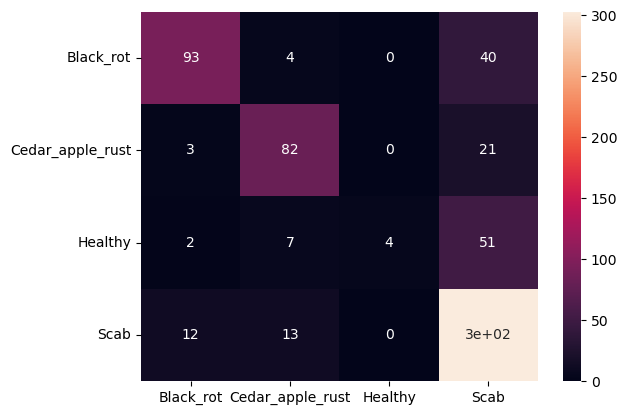

In [25]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
labels = ["Black_rot", "Cedar_apple_rust", "Healthy", "Scab"]
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

In [26]:
cm

array([[ 93,   4,   0,  40],
       [  3,  82,   0,  21],
       [  2,   7,   4,  51],
       [ 12,  13,   0, 303]], dtype=int64)

The prediction for this image is:  ['Apple___Black_rot']
The actual label for this image is:  Apple___healthy
Label: 1


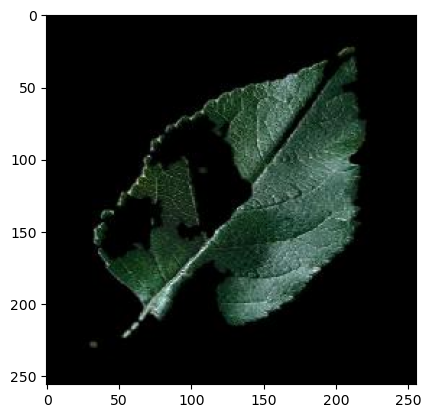

In [27]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=55 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction_RF = RF_model.predict(x_test_new)[0] 
label = prediction_RF
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])
print("Label:", label)

In [118]:
#Black Rot = 0
#Cedar Apple Rust = 1
#Healthy = 2
#Scab = 3